# In-Class Assignment: The Perceptron Classifier
# Day 18 & 19 
# CMSE 202

### <p style="text-align: right;"> &#9989; **Khushi Lute** </p>
#### <p style="text-align: right;"> &#9989; Mary, jamie, Kate, Ryleigh</p>

### Agenda for today's class

</p>

1. [The Perceptron Model](#perceptron)
1. [Loading and inspecting the data](#load-data)
1. [Build a Perceptron class (first cut)](#build)
1. [Visualing our results: plotting the decision boundary](#viz)


---
<a id="perceptron"></a>
## 1. The Perceptron Model

The perceptron is one of the first used examples of what has come to be called a neural network. Invented in 1958, it was originally hailed as a way to achieve what had come to be called "Artificial Intelligence". However, it was quickly proved that the perceptron model was limited. The claims and subsequent refutations halted neural network research for a number of years.

Perceptrons are used as a kind of **classifier** that we can train using examples. The simplest perceptron is what is known as a binary classifier. By this we mean that, we can provide individual examples of two classes (hence, a "binary" classifier) where the individuals are represented by some number of features/inputs. All examples use the same input features, but the particular feature values are used for the classification process. The goal is the create the classifier such that, when a never-seen-before individual is provided to the perceptron, it can correctly determine that individual's class

There are ways to extend the perceptron's ability to deal with multiple classes (to classify the inputs as representing one of `n` classes instead of only two), but for this exercise we will only be concerned with a binary classifer.

The limitations of a binary perceptron are that the classes must be **linearly separable**. It is easier to show than to explain. Look at the two graphs below. The axes represent the range of values for the two input features. The dots represent individual input examples based on their corresponding feature values and the colors represent the class that each individual example belongs to. 

<img src="https://i.imgur.com/pU70IHB.png">

For experiment A, it is clear that we can draw a line through the 2D input/feature space such that we can separate the examples of the two classes. For experiment B, no such line separating the two classes exists. Furthermore, it is also clear that we could draw **many** lines for A such that we separate the two classes. 

**The limitations therefore are**:
- a perceptron can only classify elements that are linearly separable
- a perceptron cannot distinguish which linear boundary is "better".

## It's a line

The way to think about what a perceptron is doing then is that it is learning a line through the feature space. We will discuss that in a minute but accepting that is true, what is a line? A line is just a simple equation with the following form:

$$y = mx + b $$

Where `m` is the slope and `b` is the intercept. We are going to train our perceptron such that it finds `m` and `b` where that particular line separates two classes.

## The setup

We are going to setup our perceptron as shown in the image below:

<img src="https://i.imgur.com/gz05jKe.png">

Remembering that each individual example is represented as a set of features, a **vector** of features, we provide a **weight** associated with each feature input. When the features of a individual example is provided, we multipy each input by its associated weight and sum those products together. 

You may think of this process as multiplying two vectors (the input vector and the weight vector) together, index to index, and summing the resulting products as what is called the **dot product**. You might note that `numpy` provides such a function.

Having obtained the dot product of feature inputs and weights, we add what is called a **bias term**. The bias is also associated with an input "feature" (notice the constant "1" at the top of the inputs) though it's value is constant for all data points. Is is the combination of weights and the bias term that allow us to find the `m` and the `b` for our equation for a line. 

Having obtained the result, we pass that result through an **activation function**. Our activation function is typically a step function such that it yields either 1 or -1 indicating whether the particular input is part of one class (1) or the other (-1). Remember, binary classifier.

---
<a id="load-data"></a>
## 2. Loading and inspecting the data

Before we build a machine learning model, we need data to base it off of. The data set we are going to use is available from the course GitHub repository and is called, `binary-iris.csv`.

You can download it from: `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/binary-iris.csv`

This file is a variation on a classic, simple classification data set for iris flowers from 1936. It is used often as a very simple test of learning systems. The original (see https://en.wikipedia.org/wiki/Iris_flower_data_set ) has 4 classes and 4 inputs, for our experiments we have modified the file to have only 2 inputs and 2 classes. 

&#9989; **Do This:** Load the data into python and visualize (with a plot) to get a sense for what it looks like. Use different colors to represent the two different iris classifications.

   sepal_length  sepal_width        label
0           5.1          3.5  Iris-setosa
1           4.9          3.0  Iris-setosa
2           4.7          3.2  Iris-setosa
3           4.6          3.1  Iris-setosa
4           5.0          3.6  Iris-setosa


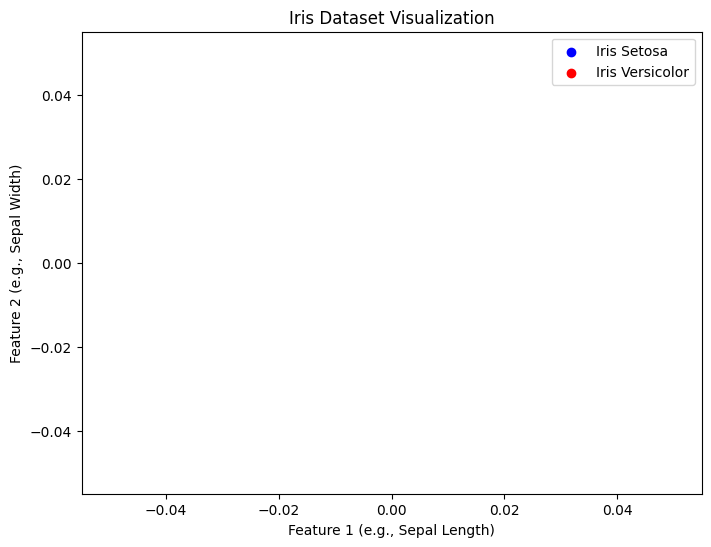

In [9]:

import pandas as pd
import matplotlib.pyplot as plt

# URL of the CSV file
url = "https://raw.githubusercontent.com/msu-cmse-courses/cmse202-supplemental-data/main/data/binary-iris.csv"

# Load the dataset directly into a pandas DataFrame
df = pd.read_csv(url)

# Print the first few rows to ensure it's loaded correctly
print(df.head())

X = df.iloc[:, :-1]  # Features (first two columns)
y = df.iloc[:, -1]   # Labels (last column)

# Plot the data
plt.figure(figsize=(8, 6))

# Plot iris setosa (label == 1) in blue
plt.scatter(X[y == 1].iloc[:, 0], X[y == 1].iloc[:, 1], color='blue', label='Iris Setosa')

# Plot iris versicolor (label == -1) in red
plt.scatter(X[y == -1].iloc[:, 0], X[y == -1].iloc[:, 1], color='red', label='Iris Versicolor')

# Labels and title
plt.xlabel('Feature 1 (e.g., Sepal Length)')
plt.ylabel('Feature 2 (e.g., Sepal Width)')
plt.title('Iris Dataset Visualization')
plt.legend()

# Show the plot
plt.show()



---
<a id="build"></a>
## 3. Build a Perceptron class (first cut)

Let's build a perceptron class but let's skip the learning process for the moment. We created a "skeleton" class for you to fill in.

&#9989; **Do This:** Complete these two classes based on the specifications below:

- an `__init__` method. Basically every class needs this to set instance attributes (i.e. the variables attached to `self` -- make sure you're using the `self.<variable>` notation!). **The `__init__` method should:**
  - Take, as an argument, the labeled data (the two data features plus a data label, -1 or 1, at the end)
  - Create an object attribute `data` for the data passed in from the file. It should contain 2D vector where each row represents a sample (e.g. an iris flower). Each row should consists of two features and a label. The labels should be modified for 1 (iris setosa) and -1 (iris versicolor). 
  - Create a 1D weight vector attribute, `weights`, of the same shape as the number of features + 1. The **"+ 1"** extra term is for the **bias weight**. For now, fill the weights with some initial value (1.0 would be resonable choice to start). We'll fix that later. Remember that in our Perceptron model from above, the **bias weight term is the first value in the list of weights**.

- The class needs a `predict` method which takes a single argument, an array of features from a **single sample** in the data set. **It should do the following:**
   - multipy (*as a dot product*) the argument feature vector and the weights for those features.
   - add the bias weight (the first value in our list of weights) to the result.
   - apply the activation function to the result to say whether the label of that input is -1 vs 1
   - return that predicted class value

In [10]:
import numpy as np

class Perceptron:
    def __init__(self, data):

        self.data = np.array(data)  # Converting input data to numpy array for easier manipulation
        self.features = self.data[:, :-1]  # Extracting features (excluding the label)
        self.labels = self.data[:, -1]    # Extracting labels (last column)
        
        # Initialize weights with 1.0 for each feature + 1 for the bias term
        self.weights = np.ones(self.features.shape[1] + 1)  # Shape: (number of features + 1 for bias)

    def predict(self, sample):
    
        # Add the bias term (first element in weights)
        sample_with_bias = np.insert(sample, 0, 1)  # Insert bias (1) at the start of the feature vector

        # Calculate the dot product between weights and the sample
        result = np.dot(self.weights, sample_with_bias)
        
        # Apply the activation function (sign function)
        prediction = 1 if result >= 0 else -1
        
        return prediction


&#9989; **Do This:** Run the following code to test your new Perceptron class. See if it works, even though it is not yet a very good classifier. Iterate on your class until the output from this cell makes sense.

In [25]:

f = open("binary-iris.csv")
header = next(f) 
data = []
for line in f:
    fields = line.split(",")
    
    label = (1.0 if fields[2].strip() == "Iris-setosa" else -1.0)
    
    data.append([float(fields[0]), float(fields[1]), label])
f.close()

p = Perceptron(data)
print("weights: ", p.weights[1:])
print("bias weight:", p.weights[0])
print("prediction: ",p.predict([1,1]))

TypeError: Perceptron.__init__() missing 2 required positional arguments: 'iters' and 'learning_rate'

### Learning

OK, now the interesting part. **We need to learn the value of the weights, including the value of the bias weight, so that the predictions of the `predict` method are good**. How do we do that?

The basic idea is this. We feed in the data that we have where we know the labels (and we do) to `predict`. We then compare the classification we want (from the existing data) and the classification we got (from the `predict` method). We use that difference to update **all the weights**. We do this for **each** of the data. 

However, we need to do one more thing. We need to not **over correct** the weights. If we do that then the weight values might swing wildly over time and never settle down. So we also provide a `learning_rate`. This rate reduces how much the weight changes. Overall then we use the following equation:

$$ self.weights[i] = self.weights[i] +  (self.learning\_rate * (class\_label - prediction\_label) * feature[i]) $$

We do this for each feature/input of the example and each corresponding weight. We also update the bias weight each time we update a weight. We use the same difference, `class_label-prediction_label`, for that update and, remember, the feature value for the bias is just "1" (from above). So, if `weights[0]` is the bias weight, then the update equation for the bias weight would be

$$ self.weights[0] = self.weights[0] + learning\_rate * (class\_label - prediction\_ label) $$

We do this for some number of iterations because, with a small `learning_rate`, we need to repeat the process to get the weight values correctly set.

### Modify our Perceptron class

We need to update our `Perceptron` class to deal with learning.

&#9989; **Do This:** Copy the class you wrote from above in the cell below and **make the following changes**:

- `__init__`, besides labeled data, should now take two more arguments: the **number of iterations of learning** you want and the **learning_rate**. These should be also stored as object attributes.
- Add a new method called `fit`. It should perform the number of iterations of learning provided in `__init__` on all the labeled data as described.
- Add a new method called `errors`. It should print out the number of errors for the predicted vs actual class labels and the current weights.

In [18]:
import numpy as np

class Perceptron():
    
    def __init__(self, labeled_data, iters, learning_rate):
    
        self.data = np.array(labeled_data) 
        self.features = self.data[:, :-1]  
        self.labels = self.data[:, -1]   
        
        self.weights = np.ones(self.features.shape[1] + 1) 
        
        self.iters = iters
        self.learning_rate = learning_rate

    def predict(self, feature_set):
    
        
        sample_with_bias = np.insert(feature_set, 0, 1)  

        
        result = np.dot(self.weights, sample_with_bias)

        return 1 if result >= 0 else -1

    def fit(self):
               
        for _ in range(self.iters):
            for i in range(len(self.features)):
                
                x_i = self.features[i]
                y_i = self.labels[i]

                
                prediction = self.predict(x_i)

                
                if prediction != y_i:
                    
                    self.weights[1:] += self.learning_rate * y_i * x_i  
                    self.weights[0] += self.learning_rate * y_i  

    def errors(self):
        
        misclassifications = 0
        for i in range(len(self.features)):
            
            x_i = self.features[i]
            y_i = self.labels[i]

            
            prediction = self.predict(x_i)

            
            if prediction != y_i:
                misclassifications += 1

        print(f"Number of errors: {misclassifications}")
        print(f"Current weights: {self.weights}")


&#9989; **Do This:** Test your code with the provided code below. Change the number of iterations, the learning rate, and see what happens. Make sure `errors` prints out the weights as you will need them below. It might be useful to write a loop or two to explore how your number of errors changes as you modify the number of iterations or the learning rate.

In [19]:
f = open("binary-iris.csv")
header = next(f)
data = []
for line in f:
    fields = line.split(",")
    label = (1.0 if fields[2].strip() == "Iris-setosa" else -1.0)
    data.append([float(fields[0]), float(fields[1]), label])
f.close()

p = Perceptron(data, 10, 0.01)
p.fit()
p.errors()

Number of errors: 4
Current weights: [ 0.77  -0.403  0.413]


---
<a id="viz"></a>
## 4. Visualizing our results: plotting the decision boundary

At this point, if you feel like your Perceptron class is working as intended, we can try and visualize this.

Once we have run our algorithm, we can try and plot the decision boundary as well as the data entries.

To make this happen, let's do some more math!

Our basic calculation is $w \cdot x + bias = 0 $ where `w` and `x` are vectors and the operation "$\cdot$" is the dot product. Since this is in two dimensions (two features for an input), we can rewrite this as: $w_1 * x_1 + w_2 * x_2 + b = 0$. 

That looks a lot like an equation of a line in the form of $Ax + By + C = 0$ if we assume $x_1 == x$ and $x_2 == y$.

if we rewrite this, isolating $x_2$, we get:

$$x_2 = \frac{-w_1}{w_2}x_1 - \frac{b}{w_2}$$ 

From that, comparing with the standard form of $y = mx+b$, we can read off our slope and intercept:

$$slope = -\frac{w_1}{w_2}$$

$$intercept = \frac{-b}{w_2}$$

Plug in your weights and plot the line. Plot the data as well where they are colored to indicate which class they belong to.

The data should be stored in the `Perceptron` instance along with the weights (which `errors` should print out) and plot the line. The separate the two classes and plot each as a different color.

weights:  [-0.79  1.07]
bias weight: 0.9
prediction for [1,1]:  1


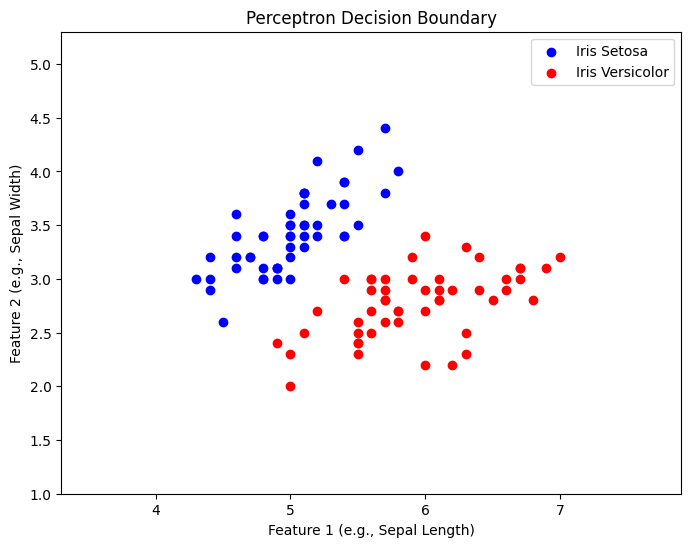

In [24]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron():
    
    def __init__(self, labeled_data, iters, learning_rate):
        self.data = np.array(labeled_data) 
        self.features = self.data[:, :-1]  
        self.labels = self.data[:, -1]    
        
        self.weights = np.ones(self.features.shape[1] + 1)  
        self.iters = iters
        self.learning_rate = learning_rate

    def predict(self, feature_set):
        sample_with_bias = np.insert(feature_set, 0, 1)  
        result = np.dot(self.weights, sample_with_bias)
        return 1 if result >= 0 else -1

    def fit(self):
        for _ in range(self.iters):
            for i in range(len(self.features)):
                x_i = self.features[i]
                y_i = self.labels[i]
                prediction = self.predict(x_i)
                if prediction != y_i:
                    self.weights[1:] += self.learning_rate * y_i * x_i 
                    self.weights[0] += self.learning_rate * y_i  
    def errors(self):
        misclassifications = 0
        for i in range(len(self.features)):
            x_i = self.features[i]
            y_i = self.labels[i]
            prediction = self.predict(x_i)
            if prediction != y_i:
                misclassifications += 1
        print(f"Number of errors: {misclassifications}")
        print(f"Current weights: {self.weights}")

    def plot_decision_boundary(self):
        
        w1, w2 = self.weights[1], self.weights[2]  
        b = self.weights[0]  
        
        
        x_min, x_max = self.features[:, 0].min() - 1, self.features[:, 0].max() + 1
        y_min, y_max = self.features[:, 1].min() - 1, self.features[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                             np.arange(y_min, y_max, 0.1))

        
        Z = (-w1 * xx - b) / w2

        
        plt.figure(figsize=(8, 6))

        plt.contourf(xx, yy, Z, levels=[-1, 0, 1], colors=["red", "blue"], alpha=0.3)

        plt.scatter(self.features[self.labels == 1][:, 0], self.features[self.labels == 1][:, 1], color='blue', label='Iris Setosa')
        plt.scatter(self.features[self.labels == -1][:, 0], self.features[self.labels == -1][:, 1], color='red', label='Iris Versicolor')

        
        plt.xlabel('Feature 1 (e.g., Sepal Length)')
        plt.ylabel('Feature 2 (e.g., Sepal Width)')
        plt.title('Perceptron Decision Boundary')
        plt.legend()

    
        plt.show()

f = open("binary-iris.csv")
header = next(f)  
data = []

for line in f:
    fields = line.split(",")
    
    label = 1.0 if fields[2].strip() == "Iris-setosa" else -1.0
    data.append([float(fields[0]), float(fields[1]), label])

f.close()
p = Perceptron(data, iters=10, learning_rate=0.1)
p.fit()
print("weights: ", p.weights[1:])
print("bias weight:", p.weights[0])
print("prediction for [1,1]: ", p.predict([1, 1]))
p.plot_decision_boundary()


-----
### Congratulations, we're done!

Now, you just need to submit this assignment by uploading it to the course <a href="https://d2l.msu.edu/">Desire2Learn</a> web page for today's submission folder (Don't forget to add your names in the first cell).


&#169; Copyright 2025, The Department of Computational Mathematics, Science and Engineering at Michigan State University